In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd ## Used only to read data

In [2]:
# Loading dataset
data1 = pd.read_csv('datasets/adult.data',header = None)

In [3]:
# Function to convert the string data points to categorical data points
def categorical(x):
    cat = []
    t = 0
    for i in range(0,len(x)):
        if(x[i] == '?'):
            x[i] = 0
        elif(x[i] not in cat):
            cat.append(x[i])
            x[i] = t
            t+=1
        else:
            temp = cat.index(x[i])
            x[i] = temp

In [4]:
# Function to convert a matrix to float values
def to_float(x):
    for i in range(x.shape[0]):
        for j in range(0,x.shape[1]):
            if(x[i][j] == '?'):
                x[i][j] = x[0][j]
            x[i][j] = float(x[i][j])

In [5]:
# Function to convert categorical values to one-hot format
def one_hot(x):
    m = np.max(x)
    res = np.zeros([x.shape[0],int(m)+1])
    for i in range(0,res.shape[0]):
        res[i][int(x[i])] = 1
    return res

In [6]:
## Sigmoid function
def sigmoid(x):
    res = np.empty(x.shape)
    for i in range(0,x.shape[0]):
        for j in range(0,x.shape[1]):
            if(x[i,j]<-700):              #### Used to overcome overflow error
                res[i,j] = 0.0
            else:
                res[i,j] = 1.0/(1+np.exp(-x[i,j]))
    return res

In [7]:
# In this step, we are converting the float data-type to categorical. This might take some time (3-4 minutes) because of large size of dataset
# This step might show a warning. However, this does not affect with the preformance.
ind = [1,3,5,6,7,8,9,13,14]
for i in ind:
    print(i)
    categorical(data1[i])
print(data1.shape)

1


/home/raktim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/raktim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


3
5
6
7
8
9
13
14
(32561, 15)


In [8]:
data2 = np.array(data1)
to_float(data2)

In [9]:
# Converting to one-hot
data3 = []
ind = [1,3,5,6,7,8,9,13]
for i in range(data2.shape[1]):
    if(i in ind):
        temp = one_hot(data2[:,i])
        for j in range(0,temp.shape[1]):
            data3.append(temp[:,j])
    else:
        data3.append(data2[:,i])

In [10]:
data = np.array(data3)
data = data.T
print(data.shape)

(32561, 109)


In [11]:
### Creating features and labels for train and test set
### 10% of total data used as test data

x_train1 = np.empty([int(data.shape[0]*0.9),data.shape[1]])
y_train1 = np.empty([int(data.shape[0]*0.9),1])
x_test1 = np.empty([data.shape[0]-int(data.shape[0]*0.9),data.shape[1]])
y_test1 = np.empty([data.shape[0]-int(data.shape[0]*0.9),1])

for i in range(0,data.shape[0]):
    for j in range(0,data.shape[1]-1):
        if(i<int(data.shape[0]*0.9)):
            x_train1[i,j] = data[i][j]
        else:
            x_test1[i-int(data.shape[0]*0.9),j] = data[i][j]

# Using bias term
x_train1[:,108] = 1e-2
x_test1[:,108] = 1e-2


for i in range(0,data.shape[0]):
    if(i<int(data.shape[0]*0.9)):
        y_train1[i,0] = data[i][108]
    else:
        y_test1[i-int(data.shape[0]*0.9),0] = data[i][108]
print(x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape)

(29304, 109) (3257, 109) (29304, 1) (3257, 1)


In [12]:
# Normalization of train set
# print(x_train1)
x_train = np.empty(x_train1.shape)
m = np.empty(x_train.shape[1])
v = np.empty(x_train.shape[1])
ind1 = [0,10,27,63,65]
for i in range(0,x_train1.shape[1]):
    if(i in ind1):
        mean = np.mean(x_train1[:,i])
        var = np.var(x_train1[:,i])
        m[i] = mean
        v[i] = var
        x_train[:,i] = x_train1[:,i] - mean*np.ones(x_train1[:,i].shape)
        x_train[:,i] = x_train[:,i]/var
    else:
        x_train[:,i] = x_train1[:,i]

y_test = y_test1

y_train = y_train1


In [18]:
# Training
epochs = 500  ## Number of epochs
w = np.ones([x_train.shape[1],1])
batch_size = 29304     ## Batch size
batch = int(x_train.shape[0]/batch_size)
lr = 0.8  ### Learning rate
loss = []
for i in range(0,epochs):
    for b in range(0,batch):
        y_pred = sigmoid(x_train[b:b+batch_size]@w)
        y_pred_t = np.reshape(y_pred,y_pred.shape[0])
        
        w = w - lr*x_train[b:b+batch_size].T@(y_pred - y_train[b:b+batch_size])/y_train.shape[0]        
    
    y_pred = sigmoid(x_train@w)
    l1 = -np.sum(y_train*np.log(y_pred+1e-8) + (1-y_train)*np.log(1-y_pred+1e-8))/y_pred.shape[0]
    print("Epoch",i,"Loss",l1)
    loss.append(l1)

Epoch 0 Loss 4.7297705650746975
Epoch 1 Loss 3.315816723048467
Epoch 2 Loss 1.999202583613422
Epoch 3 Loss 1.3558680700610302
Epoch 4 Loss 1.1577324661644426
Epoch 5 Loss 1.100368672164075
Epoch 6 Loss 1.0636095689575715
Epoch 7 Loss 1.0405673617047582
Epoch 8 Loss 1.0226182367531993
Epoch 9 Loss 1.0062512862699236
Epoch 10 Loss 0.9945031042538015
Epoch 11 Loss 0.9815158561231175
Epoch 12 Loss 0.9730915452979201
Epoch 13 Loss 0.9624543862697524
Epoch 14 Loss 0.9561723114158557
Epoch 15 Loss 0.9472635551562163
Epoch 16 Loss 0.9405825854192353
Epoch 17 Loss 0.9368673107417345
Epoch 18 Loss 0.9292347810197845
Epoch 19 Loss 0.9262217883816408
Epoch 20 Loss 0.919760133474462
Epoch 21 Loss 0.9172996534899134
Epoch 22 Loss 0.9115917532579374
Epoch 23 Loss 0.9096008663031627
Epoch 24 Loss 0.9044295754065821
Epoch 25 Loss 0.9028338305640882
Epoch 26 Loss 0.8980673330822639
Epoch 27 Loss 0.8968009155753033
Epoch 28 Loss 0.8923513323486698
Epoch 29 Loss 0.8913593014073278
Epoch 30 Loss 0.88716450

Epoch 246 Loss 0.7738992827024039
Epoch 247 Loss 0.772080678949403
Epoch 248 Loss 0.7736987457134985
Epoch 249 Loss 0.7718890436927296
Epoch 250 Loss 0.7735037169659522
Epoch 251 Loss 0.7716988975504655
Epoch 252 Loss 0.7733132204326872
Epoch 253 Loss 0.7715116121378122
Epoch 254 Loss 0.7712409884501442
Epoch 255 Loss 0.773378432724575
Epoch 256 Loss 0.7710798793441395
Epoch 257 Loss 0.7729730488594406
Epoch 258 Loss 0.770994148137664
Epoch 259 Loss 0.7727364912199024
Epoch 260 Loss 0.7708700170629621
Epoch 261 Loss 0.7725428045088863
Epoch 262 Loss 0.7707201132888862
Epoch 263 Loss 0.7723639296073078
Epoch 264 Loss 0.7705597014448485
Epoch 265 Loss 0.7721923372457793
Epoch 266 Loss 0.7703966587646989
Epoch 267 Loss 0.7720255605720636
Epoch 268 Loss 0.7702344228936816
Epoch 269 Loss 0.7718626436987096
Epoch 270 Loss 0.7700743848155224
Epoch 271 Loss 0.7698173380201346
Epoch 272 Loss 0.7719680782748399
Epoch 273 Loss 0.7696826051864091
Epoch 274 Loss 0.7715888491195911
Epoch 275 Loss 0.

Epoch 489 Loss 0.7619273665601861
Epoch 490 Loss 0.761734007404994
Epoch 491 Loss 0.7639436884282623
Epoch 492 Loss 0.7617193720279062
Epoch 493 Loss 0.7636868381319583
Epoch 494 Loss 0.7617751450139875
Epoch 495 Loss 0.7635920508846918
Epoch 496 Loss 0.761790799173688
Epoch 497 Loss 0.7635367056919472
Epoch 498 Loss 0.7617781047556152
Epoch 499 Loss 0.7634932286039211


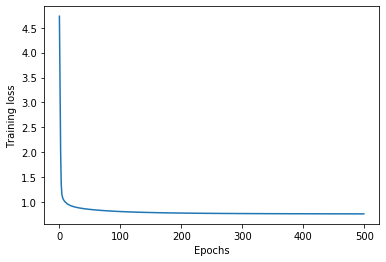

In [19]:
## Plotting the loss
ax = np.arange(len(loss))
plt.plot(ax,loss)
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.show()

In [20]:
# Normalization of test set
x_test = np.empty(x_test1.shape)
for i in range(0,x_test1.shape[1]):
    if(i in ind1):
        x_test[:,i] = x_test1[:,i] - m[i]*np.ones(x_test1[:,i].shape)
        x_test[:,i] = x_test[:,i]/v[i]
    else:
        x_test[:,i] = x_test1[:,i]

In [21]:
## Predicting on test set and finding accuracy on test set
print("Predicting on test set")
y_hat = sigmoid(x_test@w)
loss = -np.sum(y_test*np.log(y_hat+1e-8) + (1-y_test)*np.log(1-y_hat+1e-8))/y_hat.shape[0]
print("Testing loss =",loss)
for i in range(0,y_hat.shape[0]):
    if(y_hat[i]<0.5):
        y_hat[i] = 0
    else:
        y_hat[i] = 1
tot = 0.0
for i in range(0,y_hat.shape[0]):
    if(y_hat[i]==y_test[i]):
        tot+=1   
print("Testing accuracy =",(tot/y_hat.shape[0])*100,"%")

Predicting on test set
Testing loss = 0.875534444311191
Testing accuracy = 80.81056186674854 %
